In [2]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from matplotlib import pyplot

In [4]:
resnet = ResNet50(weights='imagenet')
resnet.summary()

102973440/102967424 [==============================] - 33s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

In [4]:
print(len(resnet.layers))
for layer in resnet.layers:
    print(layer)

177


(1, 56, 56, 256)


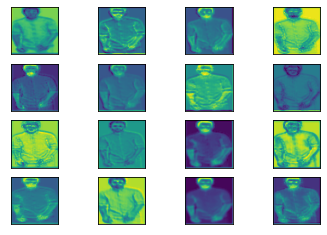

(1, 28, 28, 512)


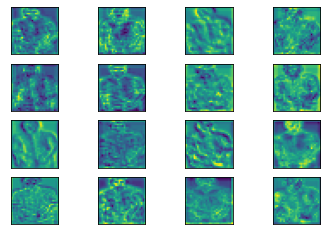

(1, 14, 14, 1024)


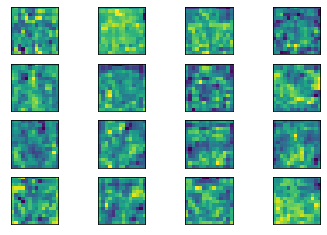

(1, 7, 7, 2048)


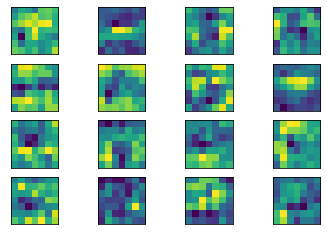

In [7]:
ixs = ['conv2_block1_3_conv', "conv3_block1_3_conv","conv4_block1_3_conv","conv5_block1_3_conv"]
outputs = [resnet.get_layer(i).output for i in ixs]
model = Model(inputs=resnet.inputs, outputs=outputs)
img = load_img('images_dataset/51v8UlSQfBL.jpg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)

img = preprocess_input(img)
feature_maps = model.predict(img)
# print(feature_maps.shape)

square = 4
for fmap in feature_maps:
    print(fmap.shape)
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(fmap[0,:,:,ix-1])
            ix += 1
    pyplot.show()